# <font style = "color:rgb(50,120,229)"> Coin Detection </font>

So far we have studied about various mophological operations and different thresholding techniques in some detail. Now it's time to apply these concepts for a practical application - **Coin Detection**.

## <font style = "color:rgb(50,120,229)"> Aim </font>

In this assignment, you will work with 2 different images (so 2 different parts) and will use **only** morphological operations and thresholding techniques to detect the total number of coins present in the image. Your submission will be graded based on your use of the concepts covered in this module, experimentation performed to achieve at your final solution, documentation, and finally, the total number of coins successfully detected in the images. Each part will be of 15 marks. This assignment will be entirely **manually graded** so make sure that you do NOT remove any experimentation you have done as well as the observation you made after each step.

**Proper documentation for each step should be provided with help of markdown**

## <font style = "color:rgb(50,120,229)">Outline</font>

The main steps that you can follow to solve this assignment are:

1. Read the image.
2. Convert it to grayscale and split the image into the 3 (Red, Green and Blue) channels. Decide which of the above 4 images you want to use in further steps and provide reason for the same.
3. Use thresholding and/or morphological operations to arrive at a final binary image.
4. Use **simple blob detector** to count the number of coins present in the image.
5. Use **contour detection** to count the number of coins present in the image.
6. Use **CCA** to count the number of coins present in the image.

**We have also provided the results we obtained at the intermediate steps for your reference.**

# <font style = "color:rgb(50,120,229)">Assignment Part - A</font>

## <font style = "color:rgb(50,120,229)"> Step 0: Include Libraries</font>

In [1]:
#include <iostream>

In [2]:
#include "../resource/lib/public/includeLibraries.h"

In [3]:
#include <opencv2/opencv.hpp>
#include <opencv2/core.hpp>
#include <opencv2/imgproc.hpp>

In [4]:
#include "../resource/lib/public/matplotlibcpp.h"
#include "../resource/lib/public/displayImages.h"

In [5]:
using namespace std;

In [6]:
using namespace cv;

In [7]:
using namespace matplotlibcpp;

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [8]:
// Image path
string imagePath = DATA_PATH + "images/CoinsA.png";
// Read image
// Store it in the variable image
///
/// YOUR CODE HERE
///
Mat image = imread(imagePath);
Mat imageCopy = image.clone();

In [9]:
plt::figure();
plt::imshow(image);
auto pltImg = displayImage(image);

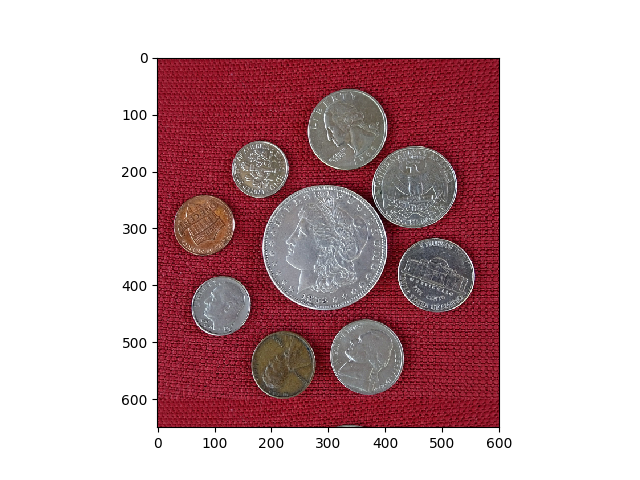

In [10]:
pltImg

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [11]:
// Convert image to grayscale
// Store it in the variable imageGray
///
/// YOUR CODE HERE
///
Mat imageGray;
cvtColor(image, imageGray, COLOR_BGR2GRAY);

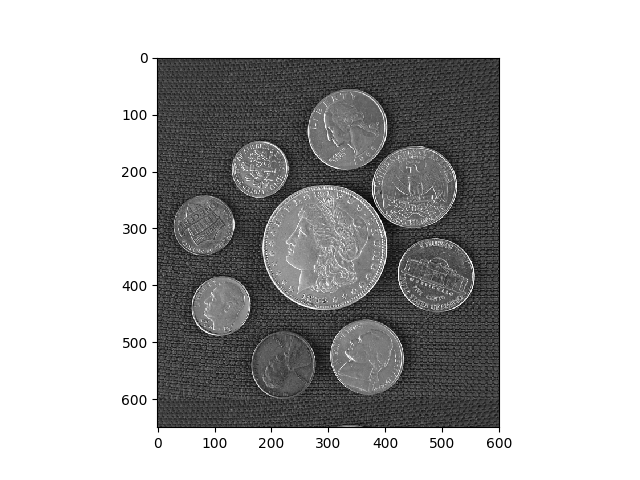

In [12]:
plt::figure();
plt::imshow(imageGray);
pltImg = displayImage(imageGray);
pltImg

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [13]:
// Split cell into channels
// Store them in variables imageB, imageG, imageR
///
/// YOUR CODE HERE
///
Mat imgChannels[3];
split(image, imgChannels);
Mat imageB = imgChannels[0];
Mat imageG = imgChannels[1];
Mat imageR = imgChannels[2];

Mat altImg;

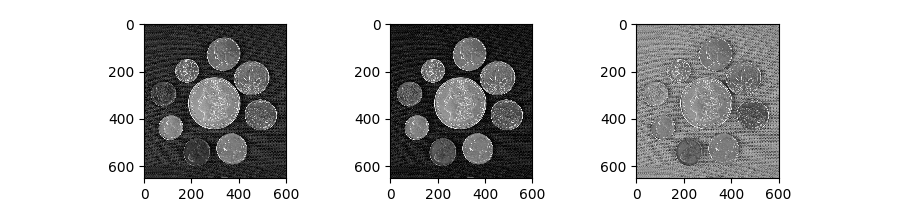

In [14]:
plt::figure_size(900,200);
plt::subplot(1,3,1);
plt::imshow(imageB);
pltImg = displayImage(imageB);
plt::subplot(1,3,2);
plt::imshow(imageG);
pltImg = displayImage(imageG);
plt::subplot(1,3,3);
plt::imshow(imageR);
pltImg = displayImage(imageR)

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [15]:
///
/// YOUR CODE HERE
///
altImg = imageG.clone();
// I first chose the grayscale image because morphological operations operate on the grayscale image, and I thought it was the image with the largest difference between the background and the coins
// However, it was difficult to completely isolate the coins from the background without having dots in the middle of the coins, so I decided to go with the green channel since I was getting better results
// This was a great exercise to learn that sometimes the different color channels can result in better morphological operation results
// I started off with 100 then went to 50, then 25 then 20 resulted in the best trade off between getting the coins and having the background be separable
threshold(altImg, altImg, 20, 255, THRESH_BINARY_INV);

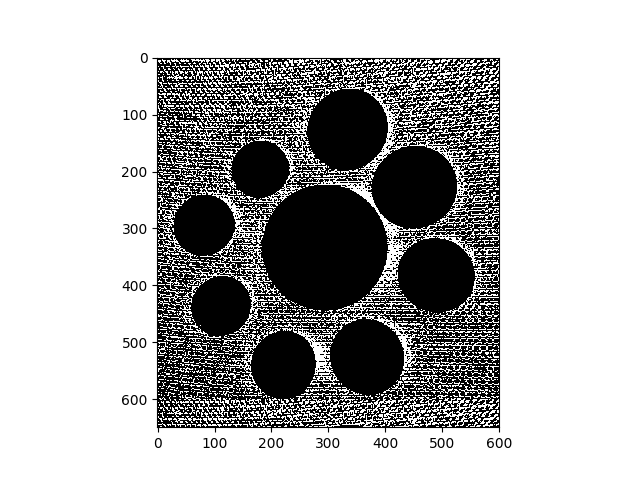

In [16]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required
plt::figure();
plt::imshow(altImg);
pltImg = displayImage(altImg);
pltImg

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [17]:
///
/// YOUR CODE HERE
///
// I first started with a kernel size of 5 and then found that 7 resulted in slightly better results
int kernelSize = 7;

// Create the kernel
Mat element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1), Point(kernelSize, kernelSize));

Mat closeImage = altImg.clone();

In [18]:
///
/// YOUR CODE HERE
///
morphologyEx(closeImage, closeImage, MORPH_CLOSE, element);

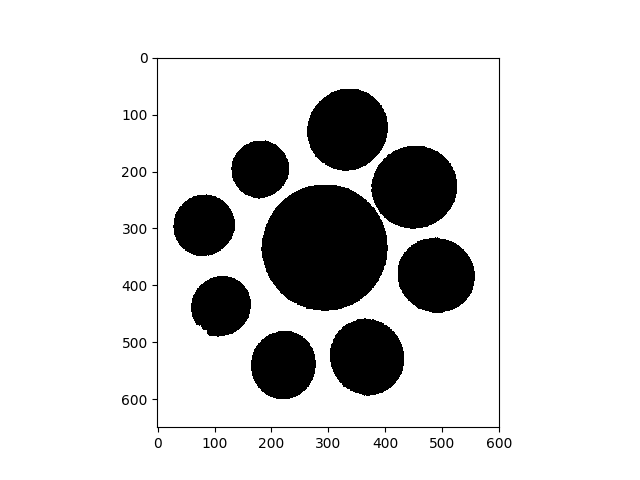

In [19]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required
plt::figure();
plt::imshow(closeImage);
pltImg = displayImage(closeImage);
pltImg

**Display all the images you have obtained in the intermediate steps**

![](../results/dilated-A.png)

In [20]:
// Get structuring element/kernel which will be used for dilation
///
/// YOUR CODE HERE
///
// Note: The below experiement was not used in the final result
// kernelSize = 2;

// // Create the kernel
// element = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize+1, 2*kernelSize+1), Point(kernelSize, kernelSize));

// openImage = closeImage.clone();

In [21]:
///
/// YOUR CODE HERE
///
// morphologyEx(openImage, openImage, MORPH_OPEN, element);

In [22]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required
// As seen in the closing and opening plots, the closing operation alone resulting in significantly better results compared to the opening operation
// This is not surprising since the closing operation removes smaller black dots from the image
// plt::figure();
// plt::imshow(openImage);
// pltImg = displayImage(openImage);
// pltImg

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [23]:
// Setup SimpleBlobDetector parameters.
SimpleBlobDetector::Params params;
// params;

params.blobColor = 0;

params.minDistBetweenBlobs = 2;

// Filter by Area
params.filterByArea = false;

// Filter by Circularity
params.filterByCircularity = true;
params.minCircularity = 0.8;

// Filter by Convexity
params.filterByConvexity = true;
params.minConvexity = 0.8;

// Filter by Inertia
params.filterByInertia = true;
params.minInertiaRatio = 0.8;

In [24]:
// Set up detector with params
Ptr<SimpleBlobDetector> detector = SimpleBlobDetector::create(params);
// detector = SimpleBlobDetector::create(params);

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector->detect(image,keypoints)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [25]:
// Detect blobs
///
/// YOUR CODE HERE
///
std::vector<KeyPoint> keypoints;
detector->detect(closeImage, keypoints);

In [26]:
// Print number of coins detected
///
/// YOUR CODE HERE
///
cout << "Number of coins detected = " << keypoints.size() << endl;

Number of coins detected = 9


**Note that we were able to detect all the 9 coins. So that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

In [27]:
// Mark coins using image annotation concepts we have studied so far
int x,y;
int radius;
double diameter;
///
/// YOUR CODE HERE
///
Mat blobCoins = image.clone();
for (int i=0; i < keypoints.size(); i++){
    KeyPoint k = keypoints[i];
    Point keyPt;
    keyPt = k.pt;
    x=(int)keyPt.x;
    y=(int)keyPt.y;
    // Mark center in BLACK
    circle(blobCoins,Point(x,y),5,Scalar(255,0,0),-1);
    // Get radius of coin
    diameter = k.size;
    radius = (int)diameter/2.0;
    // Mark blob in GREEN
    circle(blobCoins, Point(x,y),radius,Scalar(0,255,0),2);
}

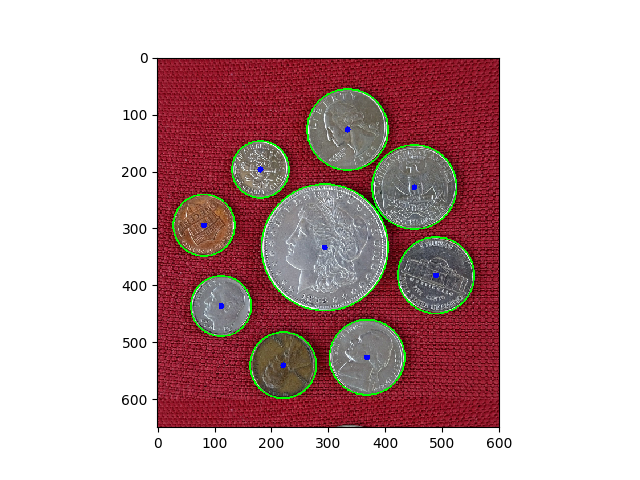

In [28]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required
plt::figure();
plt::imshow(blobCoins);
pltImg = displayImage(blobCoins);
pltImg

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In the final step, perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [29]:
Mat displayConnectedComponents(Mat &im)
{
 // Make a copy of the image
 Mat imLabels = im.clone();

 // First let's find the min and max values in imLabels
 Point minLoc, maxLoc;
 double min, max;

 // The following line finds the min and max pixel values
 // and their locations in an image.
 minMaxLoc(imLabels, &min, &max, &minLoc, &maxLoc);
 
 // Normalize the image so the min value is 0 and max value is 255.
 imLabels = 255 * (imLabels - min) / (max - min);
 
 // Convert image to 8-bits
 imLabels.convertTo(imLabels, CV_8U);
 
 // Apply a color map
 Mat imColorMap;
 applyColorMap(imLabels, imColorMap, COLORMAP_JET);

 return imColorMap;
}

In [30]:
// Find connected components
// Use displayConnectedComponents function provided above
///
/// YOUR CODE HERE
///
Mat labels;
Mat invCloseImage;
bitwise_not(closeImage, invCloseImage);
cout << "Number of Connected Components = " << connectedComponents(invCloseImage, labels) << endl;
Mat colorMap = displayConnectedComponents(labels);

Number of Connected Components = 10


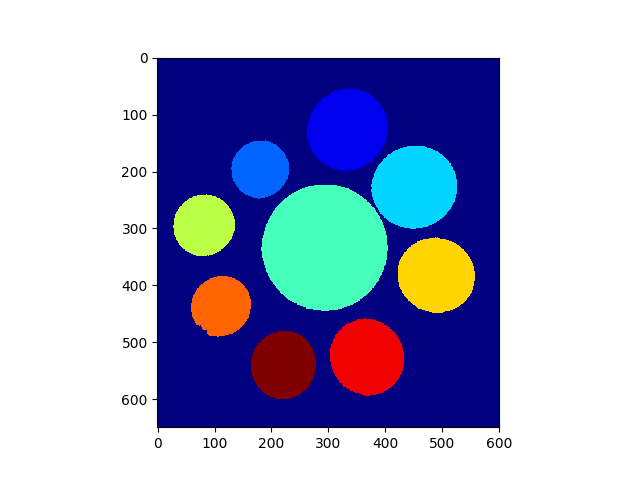

In [31]:
// Display image using matplotlibcpp
// We have provided the sample code here
// Please modify it as required
// Yes we can use CCA to compute the number of coins where each blob roughly represents a coin in the image.
// We can see that similar to other methods, the specific number of coins detected may be off due to the blob computation.
plt::figure();
plt::imshow(colorMap);
pltImg = displayImage(colorMap);
pltImg

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [32]:
// Find all contours in the image
///
/// YOUR CODE HERE
///
vector<vector<Point> > contours;
vector<Vec4i> hierarchy;

findContours(closeImage, contours, hierarchy, RETR_LIST, CHAIN_APPROX_SIMPLE  );

In [33]:
// Print the number of contours found
///
/// YOUR CODE HERE
///
cout << "Number of contours found = " << contours.size()-1;
// The 11th coin is the little contour on the larger coin. This could be removed by checking whether the contour area is creater than a certain value
// This is done in the later parts of this problem

Number of contours found = 10

@0x490bfa0

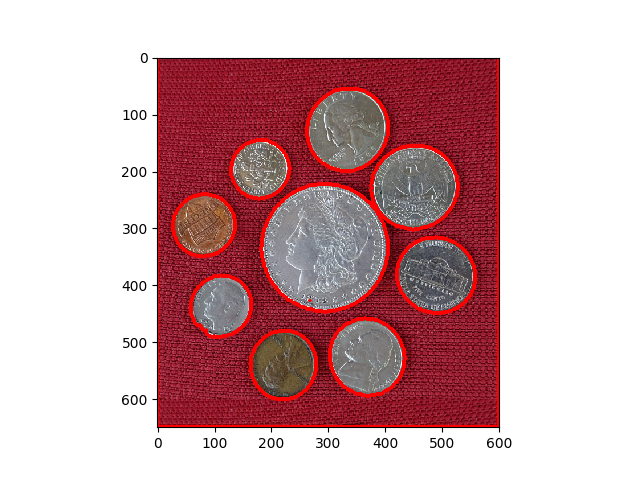

In [34]:
// Draw all contours
///
/// YOUR CODE HERE
///
Mat contourImg = image.clone();
drawContours(contourImg, contours, -1, Scalar(0,0,255), 6);
plt::figure();
plt::imshow(contourImg);
pltImg = displayImage(contourImg);
pltImg

Let's only consider the outer contours.

In [35]:
// Remove the inner contours
// Display the result
///
/// YOUR CODE HERE
///
findContours(closeImage, contours, hierarchy, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE);
cout << "Number of contours found = " << contours.size();
Mat outerContour = image.clone();
drawContours(outerContour, contours, -1, Scalar(0,0,255), 20);

Number of contours found = 1

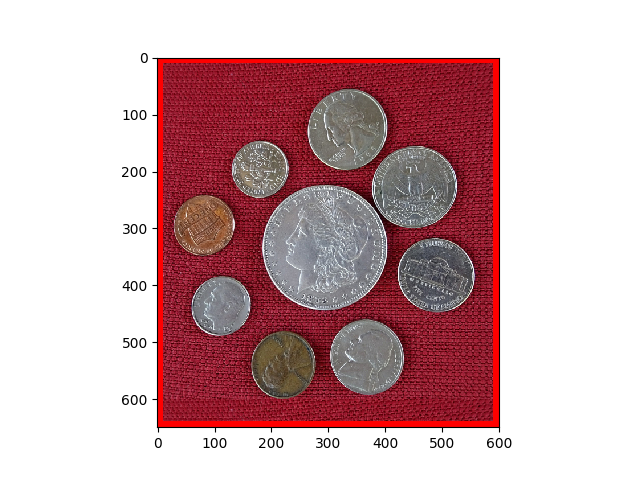

In [36]:
plt::figure();
plt::imshow(outerContour);
pltImg = displayImage(outerContour);
pltImg

So, we only need the inner contours. The easiest way to do that will be to remove the outer contour using area.

In [37]:
// Print area and perimeter of all contours
///
/// YOUR CODE HERE
///
findContours(closeImage, contours, hierarchy, RETR_LIST, CHAIN_APPROX_SIMPLE  );
int maxContourArea = -1;
int maxContourIndex = -1;
for (int i = 0; i < contours.size(); i++) {
    cout << "Countour #" << i+1 << " has area = " << contourArea(contours[i]) << " and perimeter = " << arcLength(contours[i], true) << endl;
    if (contourArea(contours[i])) {
        maxContourArea = contourArea(contours[i]);
        maxContourIndex = i;
    }
}

Countour #1 has area = 10928 and perimeter = 393.647
Countour #2 has area = 13924.5 and perimeter = 450.174
Countour #3 has area = 0 and perimeter = 0
Countour #4 has area = 8854 and perimeter = 361.848
Countour #5 has area = 14274.5 and perimeter = 449.345
Countour #6 has area = 9260.5 and perimeter = 362.576
Countour #7 has area = 38773.5 and perimeter = 743.737
Countour #8 has area = 17405 and perimeter = 496.215
Countour #9 has area = 8151.5 and perimeter = 340.434
Countour #10 has area = 16134 and perimeter = 479.73
Countour #11 has area = 388751 and perimeter = 2496


In [38]:
// Print maximum area of contour
// This will be the box that we want to remove
///
/// YOUR CODE HERE
///
cout << "Maximum area of contour = " << maxContourArea << " at contour #" << maxContourIndex+1 << endl;

Maximum area of contour = 388751 at contour #11


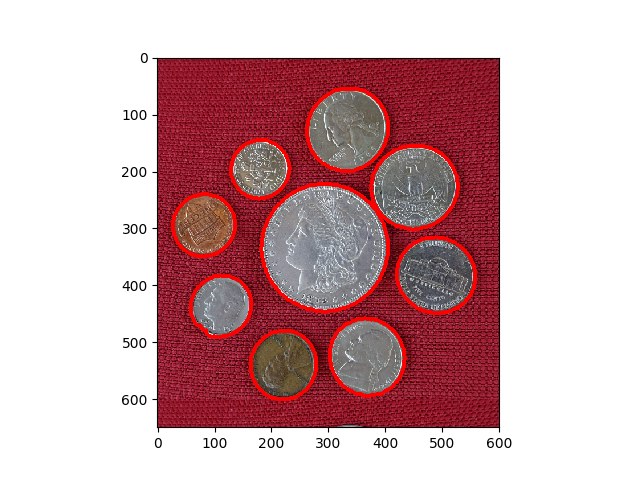

In [39]:
// Remove this contour and plot others
///
/// YOUR CODE HERE
///
// We avoid printing the contour with largest area and the small false coin contour on the larger coin
Mat innerContours = image.clone();
for (int i = 0; i < contours.size(); i++) {
    if (i != maxContourIndex && i != 2) {
        std::vector<std::vector<cv::Point> > contourVec;
        contourVec.push_back(contours[i]);
        drawContours(innerContours, contourVec, -1, Scalar(0,0,255), 5);
    }
}
plt::figure();
plt::imshow(innerContours);
pltImg = displayImage(innerContours);
pltImg

In [40]:
// Fit circles on coins
///
/// YOUR CODE HERE
///
Mat coinCircles = image.clone();
Point2f centerCnt;
float radiusCnt;
for (size_t i=0; i < contours.size(); i++){
    if (i != 2 && i != maxContourIndex) {
        // Fit a circle
        minEnclosingCircle(contours[i],centerCnt,radiusCnt);
        circle(coinCircles,centerCnt,radiusCnt, Scalar(255,255,255), 5);
    }
}

cout << "Number of coins detected = " << contours.size()-2 << endl;

Number of coins detected = 9


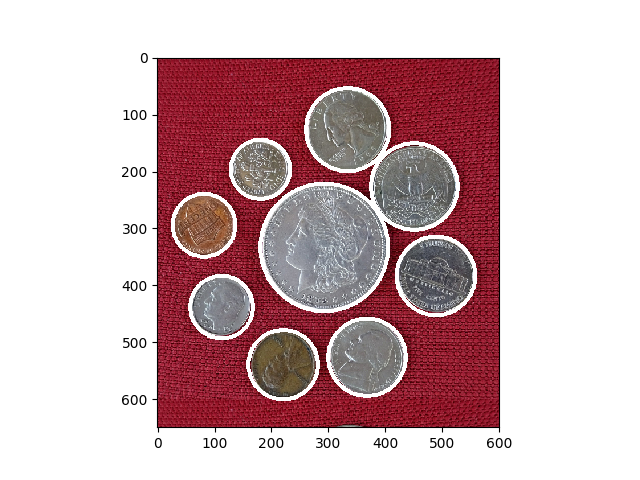

In [41]:
plt::figure();
plt::imshow(coinCircles);
pltImg = displayImage(coinCircles);
pltImg

# <font style = "color:rgb(50,120,229)">Assignment Part - B</font>

**Follow the same steps as provided in Assignment Part - A**

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [42]:
// Image path
imagePath = DATA_PATH + "images/CoinsB.png";
// Read image
// Store it in variable image
///
/// YOUR CODE HERE
///
Mat image2 = imread(imagePath);
Mat imageCopy2 = image2.clone();

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [43]:
// Convert image to grayscale
// Store it in the variable imageGray
///
/// YOUR CODE HERE
///
Mat imageGray2;
cvtColor(image2, imageGray2, COLOR_BGR2GRAY);

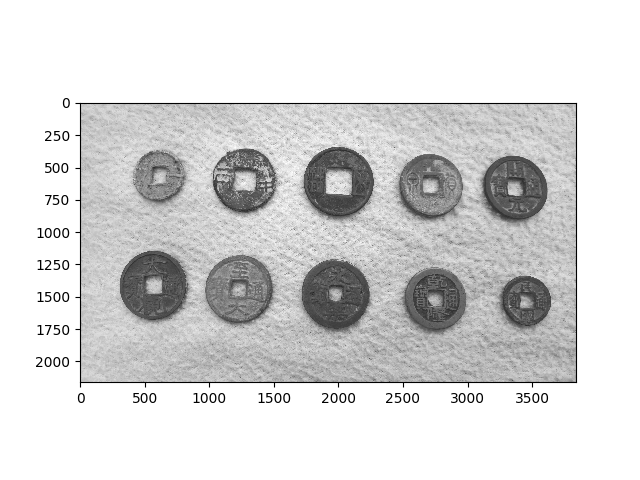

In [44]:
// Display image
plt::figure();
plt::imshow(imageGray2);
pltImg = displayImage(imageGray2);
pltImg

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [45]:
// Split cell into channels
// Store them in variables imageB, imageG, imageR
///
/// YOUR CODE HERE
///
Mat imgChannels2[3];
split(image2, imgChannels2);
Mat imageB2 = imgChannels2[0];
Mat imageG2 = imgChannels2[1];
Mat imageR2 = imgChannels2[2];

Mat altImg2;

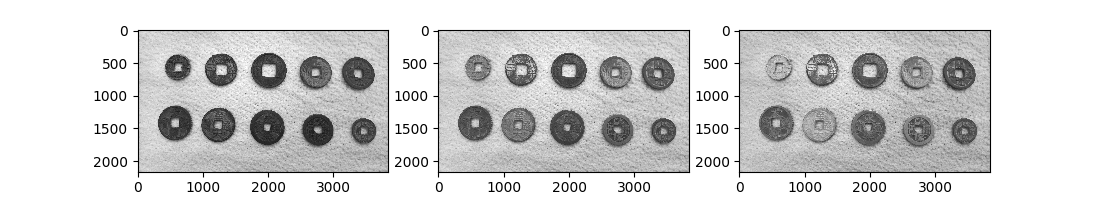

In [46]:
plt::figure_size(1100,200);
plt::subplot(1,3,1);
plt::imshow(imageB2);
pltImg = displayImage(imageB2);
plt::subplot(1,3,2);
plt::imshow(imageG2);
pltImg = displayImage(imageG2);
plt::subplot(1,3,3);
plt::imshow(imageR2);
pltImg = displayImage(imageR2)

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [47]:
///
/// YOUR CODE HERE
///
// I chose the blue color channel image because it had the largest contrast between the background and coins and all the coins had similar color and minimized erosion
altImg2 = imageB2.clone();
// TODO: Comments
threshold(altImg2, altImg2, 150, 255, THRESH_BINARY);

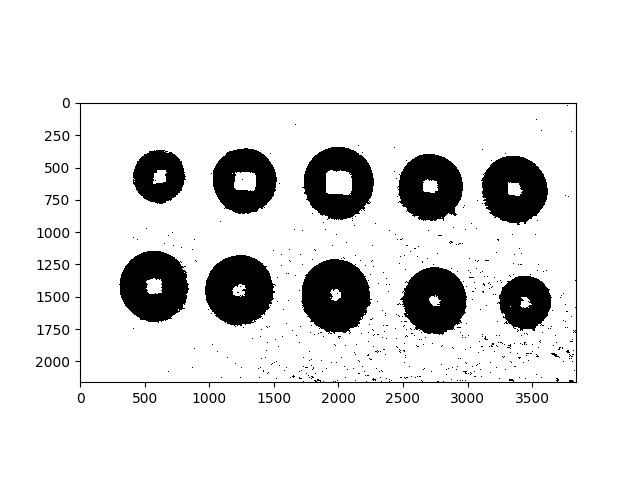

In [48]:
plt::figure();
plt::imshow(altImg2);
pltImg = displayImage(altImg2);
pltImg

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [49]:
///
/// YOUR CODE HERE
///
// Closing operation removes the black blob noise from the background
int kernelSize2 = 20;

// Create the kernel
Mat element2 = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize2+1, 2*kernelSize2+1), Point(kernelSize2, kernelSize2));

Mat closeImage2 = altImg2.clone();

In [50]:
///
/// YOUR CODE HERE
///
morphologyEx(closeImage2, closeImage2, MORPH_CLOSE, element2);

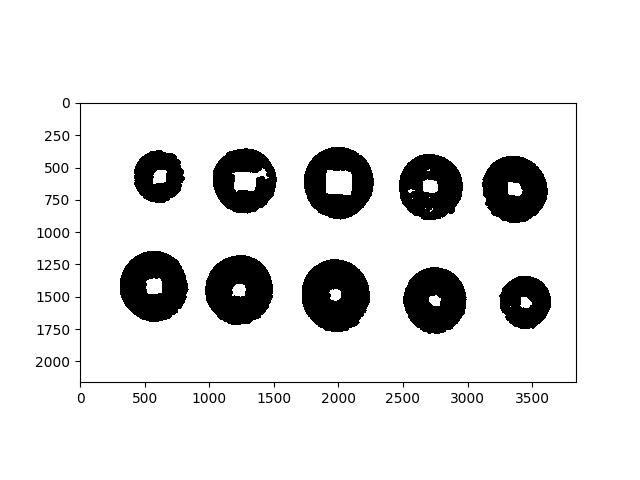

In [51]:
///
/// YOUR CODE HERE
///
plt::figure();
plt::imshow(closeImage2);
pltImg = displayImage(closeImage2);
pltImg

In [52]:
///
/// YOUR CODE HERE
///
// Opening operation to close the center of the coin. Any kernel size greater than 60 begins to combine the coins, which is undesirable
kernelSize2 = 65;

// Create the kernel
element2 = getStructuringElement(MORPH_ELLIPSE, Size(2*kernelSize2+1, 2*kernelSize2+1), Point(kernelSize2, kernelSize2));

Mat openImage2 = closeImage2.clone();

In [53]:
///
/// YOUR CODE HERE
///
morphologyEx(openImage2, openImage2, MORPH_OPEN, element2);

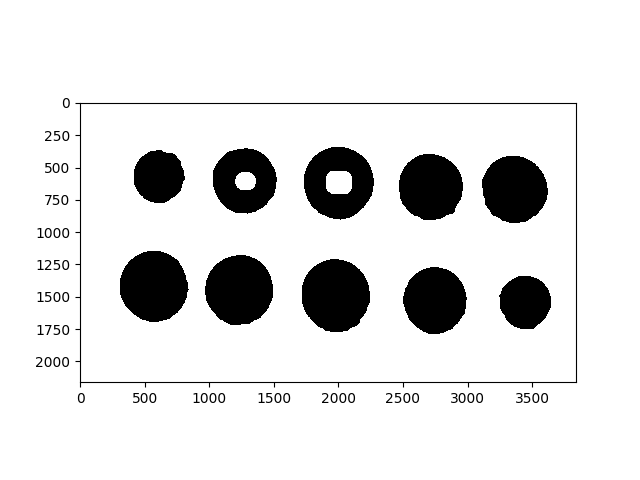

In [54]:
///
/// YOUR CODE HERE
///
// We can see that the below image improves on the given image as it does not contain any extra black blobs from the background noise
plt::figure();
plt::imshow(openImage2);
pltImg = displayImage(openImage2);
pltImg

In [55]:
///
/// YOUR CODE HERE
///
// All experimentation was done using the closing and opening operations as any other morphological operation would change the shape charactersitic of the coins

In [56]:
///
/// YOUR CODE HERE
///


In [57]:
///
/// YOUR CODE HERE
///


In [58]:
///
/// YOUR CODE HERE
///

In [59]:
///
/// YOUR CODE HERE
///


In [60]:
///
/// YOUR CODE HERE
///

In [61]:
///
/// YOUR CODE HERE
///


In [62]:
///
/// YOUR CODE HERE
///

In [63]:
///
/// YOUR CODE HERE
///


In [64]:
///
/// YOUR CODE HERE
///

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [65]:
// Setup SimpleBlobDetector parameters.

params.blobColor = 0;

params.minDistBetweenBlobs = 2;

// Filter by Area
params.filterByArea = false;

// Filter by Circularity
params.filterByCircularity = true;
params.minCircularity = 0.8;

// Filter by Convexity
params.filterByConvexity = true;
params.minConvexity = 0.8;

// Filter by Inertia
params.filterByInertia = true;
params.minInertiaRatio = 0.8;

In [66]:
// Set up detector with params
detector = SimpleBlobDetector::create(params);

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector->detect(image,keypoints)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [67]:
// Detect blobs
///
/// YOUR CODE HERE
///
detector->detect(openImage2, keypoints);

In [68]:
// Print number of coins detected
///
/// YOUR CODE HERE
///
// We can detect all but 2 coins (the ones without the centers filled in)
cout << "Number of coins detected = " << keypoints.size() << endl;

Number of coins detected = 8


**Note that we were able to detect 8 coins. So, that's your benchmark.**

## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>

Make sure to mark the center of the blobs as well. **Use only the functions discussed in Image Annotation section in Week 1**

### <font style = "color:rgb(8,133,37)">Hints</font>
You can extract the coordinates of the center and the diameter of a blob using **`k.pt`** and **`k.size`** where `k` is a keypoint.

In [69]:
// Mark coins using image annotation concepts we have studied so far
///
/// YOUR CODE HERE
///
Mat blobCoins2 = image2.clone();
for (int i=0; i < keypoints.size(); i++){
    KeyPoint k = keypoints[i];
    Point keyPt;
    keyPt = k.pt;
    x=(int)keyPt.x;
    y=(int)keyPt.y;
    // Mark center in BLACK
    circle(blobCoins2,Point(x,y),10,Scalar(255,0,0),-1);
    // Get radius of coin
    diameter = k.size;
    radius = (int)diameter/2.0;
    // Mark blob in GREEN
    circle(blobCoins2, Point(x,y),radius,Scalar(0,0,255),5);
}

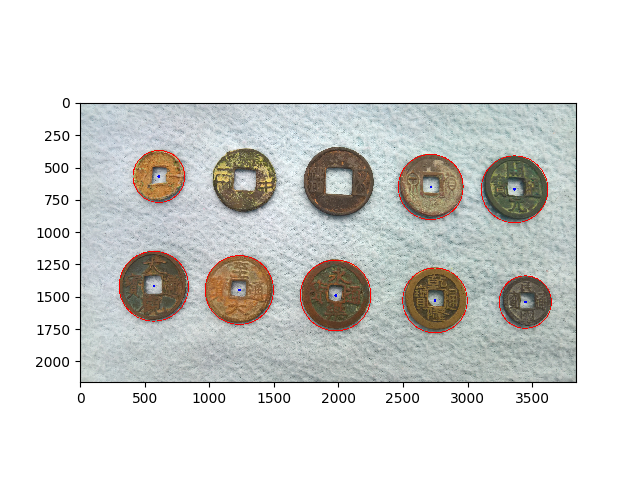

In [70]:
///
/// YOUR CODE HERE
///
plt::figure();
plt::imshow(blobCoins2);
pltImg = displayImage(blobCoins2);
pltImg

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

In the final step, perform Connected Component Analysis (CCA) on the binary image to find out the number of connected components. Do you think we can use CCA to calculate number of coins? Why/why not?

In [71]:
// # Find connected components
///
/// YOUR CODE HERE
///
// Yes we can use CCA to compute the number of coins. However, the number of detected coins may be over estimated based on any smaller dots or remaining background noise
Mat invOpenImage2;
bitwise_not(openImage2, invOpenImage2);
cout << "Number of Connected Components = " << connectedComponents(invOpenImage2, labels) << endl;
Mat colorMap2 = displayConnectedComponents(labels);

Number of Connected Components = 11


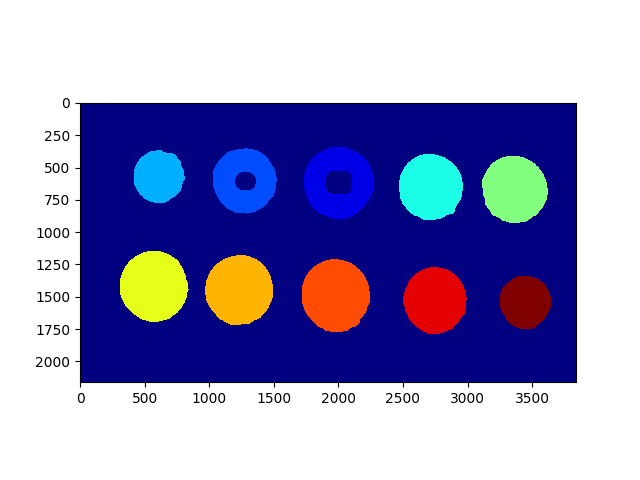

In [72]:
///
/// YOUR CODE HERE
///
plt::figure();
plt::imshow(colorMap2);
pltImg = displayImage(colorMap2);
pltImg

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>

In the final step, perform Contour Detection on the binary image to find out the number of coins.

In [73]:
// Find all contours in the image
///
/// YOUR CODE HERE
///
findContours(openImage2, contours, hierarchy, RETR_LIST, CHAIN_APPROX_SIMPLE);

In [74]:
// Print the number of contours found
///
/// YOUR CODE HERE
///
cout << "Number of contours found = " << contours.size();

Number of contours found = 13

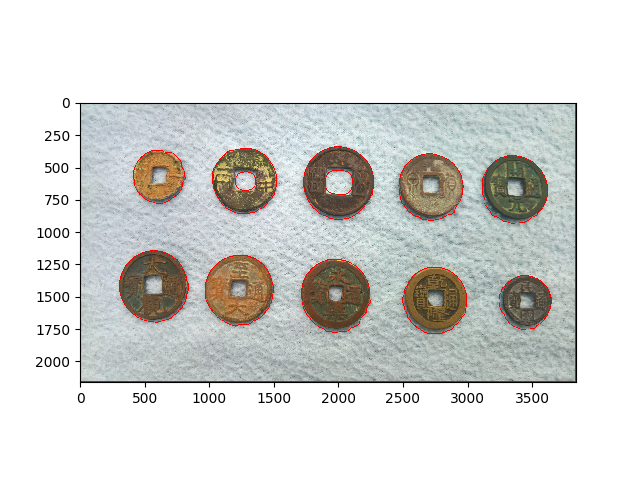

In [75]:
// Draw all contours
///
/// YOUR CODE HERE
///
// All coin contours + outer border + 2 inner coin contours
Mat contourImg2 = image2.clone();
drawContours(contourImg2, contours, -1, Scalar(0,0,255), 6);
plt::figure();
plt::imshow(contourImg2);
pltImg = displayImage(contourImg2);
pltImg

Let's only consider the outer contours.

In [76]:
// Remove the inner contours
// Display the result
///
/// YOUR CODE HERE
///
findContours(openImage2, contours, hierarchy, RETR_EXTERNAL, CHAIN_APPROX_SIMPLE);
cout << "Number of contours found = " << contours.size();
Mat outerContour2 = image2.clone();
drawContours(outerContour2, contours, -1, Scalar(0,0,255), 100);

Number of contours found = 1

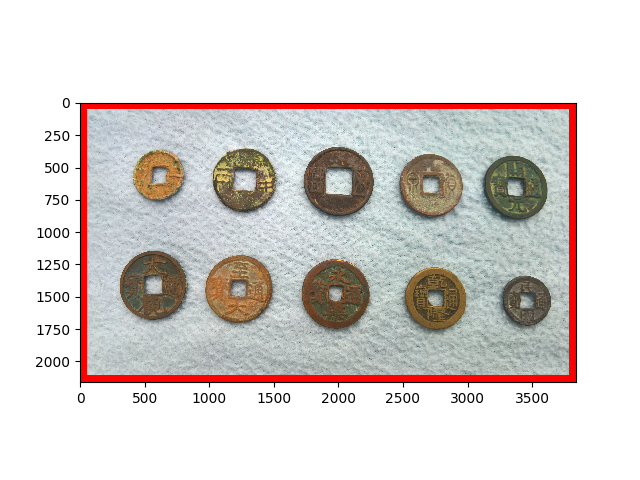

In [77]:
plt::figure();
plt::imshow(outerContour2);
pltImg = displayImage(outerContour2);
pltImg

What do you think went wrong? As we can see, the outer box was detected as a contour and with respect to it, all other contours are internal and that's why they were not detected. How do we remove that? Let's see if we can use area of contours here.

In [78]:
// Print area and perimeter of all contours
///
/// YOUR CODE HERE
///
findContours(openImage2, contours, hierarchy, RETR_LIST, CHAIN_APPROX_SIMPLE  );
maxContourArea = -1;
maxContourIndex = -1;
for (int i = 0; i < contours.size(); i++) {
    cout << "Countour #" << i+1 << " has area = " << contourArea(contours[i]) << " and perimeter = " << arcLength(contours[i], true) << endl;
    if (contourArea(contours[i])) {
        maxContourArea = contourArea(contours[i]);
        maxContourIndex = i;
    }
}

Countour #1 has area = 128718 and perimeter = 1353.35
Countour #2 has area = 197655 and perimeter = 1676.67
Countour #3 has area = 234650 and perimeter = 1828.31
Countour #4 has area = 223626 and perimeter = 1780.51
Countour #5 has area = 228069 and perimeter = 1802.07
Countour #6 has area = 18566.5 and perimeter = 512.517
Countour #7 has area = 32897.5 and perimeter = 683.002
Countour #8 has area = 207784 and perimeter = 1717.01
Countour #9 has area = 200738 and perimeter = 1693.17
Countour #10 has area = 126624 and perimeter = 1352.28
Countour #11 has area = 196965 and perimeter = 1672.04
Countour #12 has area = 237800 and perimeter = 1835.62
Countour #13 has area = 8.2884e+06 and perimeter = 11996


In [79]:
// Print maximum area of contour
// This will be the box that we want to remove
///
/// YOUR CODE HERE
///
cout << "Maximum area of contour = " << maxContourArea << endl;

Maximum area of contour = 8288401


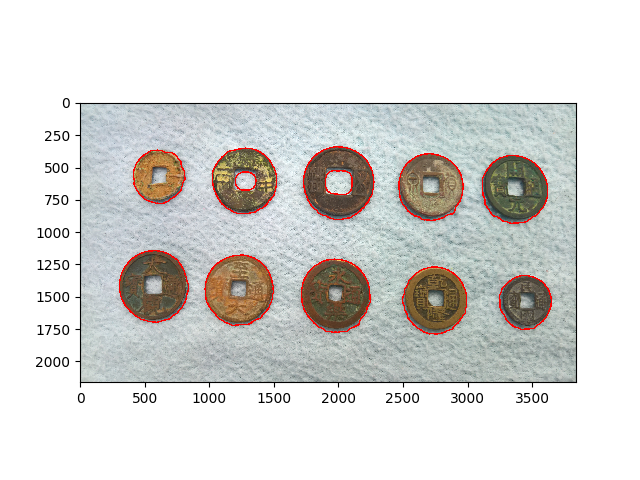

In [80]:
// Remove this contour and plot others
///
/// YOUR CODE HERE
///
Mat innerContours2 = image2.clone();
for (int i = 0; i < contours.size(); i++) {
    if (i != maxContourIndex) {
        std::vector<std::vector<cv::Point> > contourVec;
        contourVec.push_back(contours[i]);
        drawContours(innerContours2, contourVec, -1, Scalar(0,0,255), 10);
    }
}
plt::figure();
plt::imshow(innerContours2);
pltImg = displayImage(innerContours2);
pltImg

Now, we have to remove the internal contours. Again here we can use area or perimeter.

In [81]:
// Print area and perimeter of all contours
///
/// YOUR CODE HERE
///
findContours(openImage2, contours, hierarchy, RETR_LIST, CHAIN_APPROX_SIMPLE  );
maxContourArea = -1;
maxContourIndex = -1;
for (int i = 0; i < contours.size(); i++) {
    cout << "Countour #" << i+1 << " has area = " << contourArea(contours[i]) << " and perimeter = " << arcLength(contours[i], true) << endl;
    if (contourArea(contours[i])) {
        maxContourArea = contourArea(contours[i]);
        maxContourIndex = i;
    }
}

Countour #1 has area = 128718 and perimeter = 1353.35
Countour #2 has area = 197655 and perimeter = 1676.67
Countour #3 has area = 234650 and perimeter = 1828.31
Countour #4 has area = 223626 and perimeter = 1780.51
Countour #5 has area = 228069 and perimeter = 1802.07
Countour #6 has area = 18566.5 and perimeter = 512.517
Countour #7 has area = 32897.5 and perimeter = 683.002
Countour #8 has area = 207784 and perimeter = 1717.01
Countour #9 has area = 200738 and perimeter = 1693.17
Countour #10 has area = 126624 and perimeter = 1352.28
Countour #11 has area = 196965 and perimeter = 1672.04
Countour #12 has area = 237800 and perimeter = 1835.62
Countour #13 has area = 8.2884e+06 and perimeter = 11996


Notice carefully that there are 2 contours that have area smaller than others. In our case, those are contours 6 and 7. Let's remove them.

In [82]:
// Remove contours
///
/// YOUR CODE HERE
///
Mat coinContours2 = image2.clone();
for (int i = 0; i < contours.size(); i++) {
    if (i != maxContourIndex && i != 5 && i != 6) {
        std::vector<std::vector<cv::Point> > contourVec;
        contourVec.push_back(contours[i]);
        drawContours(coinContours2, contourVec, -1, Scalar(0,0,255), 10);
    }
}

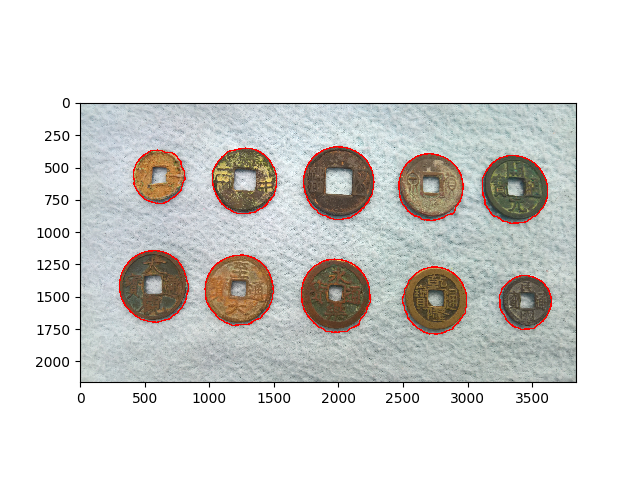

In [83]:
// Draw revised contours
///
/// YOUR CODE HERE
///
plt::figure();
plt::imshow(coinContours2);
pltImg = displayImage(coinContours2);
pltImg

In [84]:
// Fit circles on coins
///
/// YOUR CODE HERE
///
Mat coinCircles2 = image2.clone();
Point2f center2;
float radius2;
for (size_t i=0; i < contours.size(); i++){
    if (i != maxContourIndex && i != 5 && i != 6) {
        // Fit a circle
        minEnclosingCircle(contours[i],center2,radius2);
        circle(coinCircles2,center2,radius2, Scalar(255,255,255), 5);
    }
}

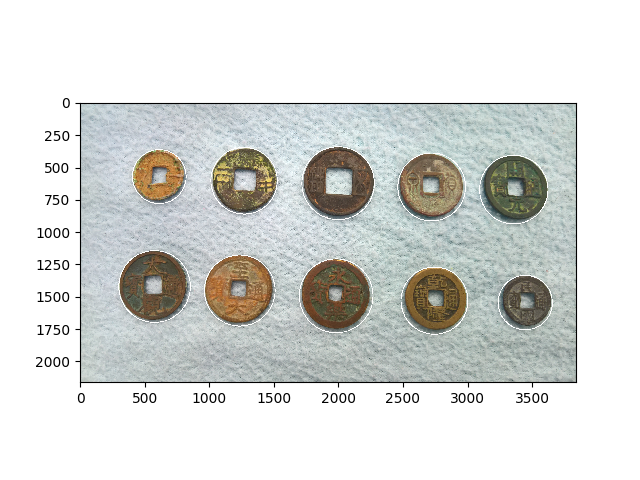

In [85]:
plt::figure();
plt::imshow(coinCircles2);
pltImg = displayImage(coinCircles2);
pltImg